In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iea-global-ev-data-2024/IEA Global EV Data 2024.csv


In [2]:
df=pd.read_csv('/kaggle/input/iea-global-ev-data-2024/IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
df.shape



(12654, 8)

In [4]:
df.size

101232

In [5]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of           region          category           parameter    mode  \
0      Australia        Historical      EV stock share    Cars   
1      Australia        Historical      EV sales share    Cars   
2      Australia        Historical            EV sales    Cars   
3      Australia        Historical            EV stock    Cars   
4      Australia        Historical            EV stock    Cars   
...          ...               ...                 ...     ...   
12649      World  Projection-STEPS      EV sales share    Cars   
12650      World  Projection-STEPS      EV stock share    Cars   
12651      World    Projection-APS  EV charging points      EV   
12652      World    Projection-APS  EV charging points      EV   
12653      World  Projection-STEPS      EV stock share  Trucks   

                    powertrain  year             unit         value  
0                           EV  2011          percent  3.900000e-04  
1                           EV  201

In [7]:
df.groupby('parameter')['value'].sum().sort_values(ascending=False)

parameter
EV stock                         4.318026e+09
EV sales                         8.160755e+08
EV charging points               2.521943e+08
Electricity demand               1.674709e+07
Oil displacement, million lge    4.933790e+06
EV sales share                   1.229462e+04
EV stock share                   3.430211e+03
Oil displacement Mbd             8.448808e+01
Name: value, dtype: float64

Le parametre le plus utiliser est "Oil displacement Mbd " par la valeur de "8.448808e+01"

In [8]:
df[df['parameter']=='EV sales'].groupby('region')['value'].sum().sort_values(ascending=False)

region
World                   3.975844e+08
China                   1.733756e+08
Europe                  9.493940e+07
USA                     6.271455e+07
Rest of the world       5.300158e+07
India                   1.117940e+07
EU27                    8.944714e+06
Germany                 3.012826e+06
France                  1.666650e+06
United Kingdom          1.659853e+06
Norway                  8.798130e+05
Netherlands             7.989202e+05
Sweden                  7.061660e+05
Korea                   6.763520e+05
Japan                   6.277300e+05
Canada                  6.008460e+05
Italy                   5.111950e+05
Belgium                 4.793650e+05
Spain                   3.849770e+05
Switzerland             2.876520e+05
Denmark                 2.703310e+05
Austria                 2.215390e+05
Australia               1.844040e+05
Portugal                1.800610e+05
Israel                  1.516740e+05
Finland                 1.496590e+05
New Zealand             1.01935

La region la plus grandes des nombres de EV Sales est "World" par la valeur "3.975844e+08"


In [9]:
df[df['parameter']=='EV sales'].groupby('year')['value'].sum().sort_values(ascending=False)

year
2035    2.874471e+08
2030    1.898583e+08
2023    9.201244e+07
2025    9.162160e+07
2022    6.867026e+07
2021    4.512345e+07
2020    2.151742e+07
2019    5.557852e+06
2018    5.192548e+06
2017    3.351445e+06
2016    2.186306e+06
2015    1.633905e+06
2014    8.680802e+05
2013    5.535577e+05
2012    3.246125e+05
2011    1.306080e+05
2010    2.606400e+04
Name: value, dtype: float64

L'annee qui la plus de Parametre="EV sales" est "2035" par la valeur "2.874471e+08"

In [10]:
df.groupby('powertrain')['value'].sum().sort_values(ascending=False)

powertrain
BEV                        4.069283e+09
PHEV                       1.027788e+09
Publicly available slow    1.587097e+08
Publicly available fast    9.348456e+07
FCEV                       3.703030e+07
EV                         2.169669e+07
Name: value, dtype: float64

In [11]:
df[df["unit"]=="percent"].groupby('unit')['value'].sum().sort_values(ascending=False)

unit
percent    15724.828372
Name: value, dtype: float64

la valeur dunit "percent" est 15724.828372


In [12]:
df[df['unit']=='percent'].groupby('year')['value'].mean().sort_values(ascending=False)

year
2035    38.812500
2030    22.380937
2025     9.158052
2023     8.527600
2022     6.768971
2021     5.055558
2020     3.720707
2019     2.160088
2018     1.605808
2017     1.262710
2016     1.048825
2015     0.791470
2014     0.427188
2013     0.249782
2012     0.155861
2011     0.070156
2010     0.048131
Name: value, dtype: float64

In [13]:
def analyse_par_colonne(df, colonne, param):
    data = df[df['parameter'] == param]
    return data.groupby(colonne)['value'].sum().sort_values(ascending=False)


In [14]:
analyse_par_colonne(df,'parameter','EV stock')

parameter
EV stock    4.318026e+09
Name: value, dtype: float64

In [15]:
analyse_par_colonne(df,'parameter','EV sales share')

parameter
EV sales share    12294.616955
Name: value, dtype: float64

In [16]:
for region in df['region'].unique():
    total = df[(df['region'] == region) & (df['parameter'] == 'EV sales')]['value'].sum()
    print(region, ":", total)


Australia : 184404.0
Austria : 221539.0
Belgium : 479365.0
Brazil : 94760.0
Bulgaria : 4623.0
Canada : 600846.0
Chile : 3877.0
China : 173375628.0
Colombia : 16023.0
Costa Rica : 8831.0
Croatia : 7557.0
Cyprus : 2260.0
Czech Republic : 34300.0
Denmark : 270331.0
Estonia : 4585.0
EU27 : 8944714.0
Europe : 94939403.0
Finland : 149659.0
France : 1666650.0
Germany : 3012826.0
Greece : 35644.0
Hungary : 42035.0
Iceland : 50337.0
India : 11179396.900000095
Indonesia : 0.0
Ireland : 88570.0
Israel : 151674.00100000005
Italy : 511195.0
Japan : 627730.0
Korea : 676352.0
Latvia : 4687.0
Lithuania : 6673.0
Luxembourg : 42100.0
Mexico : 39610.0
Netherlands : 798920.2000000477
New Zealand : 101935.0
Norway : 879813.0
Poland : 91933.0
Portugal : 180061.0
Rest of the world : 53001585.0
Romania : 39488.0
Seychelles : 338.0
Slovakia : 13351.0
Slovenia : 13363.0
South Africa : 3463.0
Spain : 384977.0
Sweden : 706166.0
Switzerland : 287652.0
Thailand : 0.0
Turkiye : 82638.0
United Arab Emirates : 52804.0

<Axes: title={'center': 'EV Stock par année'}, xlabel='year'>

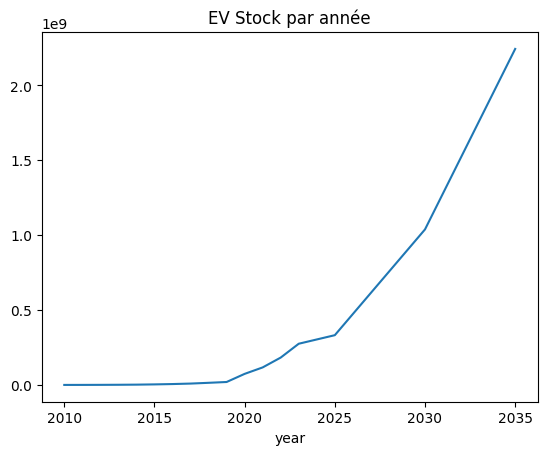

In [17]:
import matplotlib.pyplot as plt 
stock_year = df[df['parameter'] == 'EV stock'].groupby('year')['value'].sum()
stock_year.plot(kind='line', title='EV Stock par année')


Les données montrent une croissance significative du marché des véhicules électriques.
Certaines régions dominent les ventes et le stock EV, ce qui indique une transition
énergétique avancée. Ces résultats peuvent aider les décideurs à orienter leurs stratégies
d’investissement dans le secteur de la mobilité durable.